In [73]:
import dust_emissivity
from astropy import units as u
from astropy import constants as const
from matplotlib import pyplot as pl
import numpy as np
import regions
from astropy.io import fits
from astropy import wcs
from spectral_cube import SpectralCube


In [3]:
print('test')

test


In [4]:
#  Collision site
pacs160 = 358.38372 * u.Jy
pacs70  = 31.272129 * u.Jy
her350  = 184.0481 * u.Jy
her250  = 320.71168 * u.Jy
her500  = 78.398848 * u.Jy
bolo11  = 4.7052907 * u.Jy
atlas850= 22.663 * u.Jy
reg = regions.Regions.read('../G5/sum/spw17_12CO/ccc.reg')

In [62]:
# G5b 
pacs160 = 935.72057 * u.Jy #1695.505 * u.Jy #358.38372 * u.Jy
pacs70  = 81.665705 * u.Jy #273.89817 * u.Jy #31.272129 * u.Jy
her350  = 436.96762 * u.Jy #758.69611 * u.Jy #184.0481 * u.Jy
her250  = 798.94536 * u.Jy #1399.1185 * u.Jy #320.71168 * u.Jy
her500  = 175.17277 * u.Jy #334.23452 * u.Jy #78.398848 * u.Jy
bolo11  = 8.5816241 * u.Jy #13.466688 * u.Jy #4.7052907 * u.Jy
atlas850= 45.911349 * u.Jy #99.474503 * u.Jy #22.663 * u.Jy
reg = regions.Regions.read('/orange/adamginsburg/cmz/g5/code/g5-lowvelo.reg')

In [90]:
# G5a
pacs160 = 1695.505 * u.Jy #358.38372 * u.Jy
pacs70  = 273.89817 * u.Jy #31.272129 * u.Jy
her350  = 758.69611 * u.Jy #184.0481 * u.Jy
her250  = 1399.1185 * u.Jy #320.71168 * u.Jy
her500  = 334.23452 * u.Jy #78.398848 * u.Jy
bolo11  = 13.466688 * u.Jy #4.7052907 * u.Jy
atlas850= 99.474503 * u.Jy #22.663 * u.Jy
reg = regions.Regions.read('/orange/adamginsburg/cmz/g5/code/g5-highvelo.reg')


In [4]:
# Field 2
pacs160 = 1293.3408711236984 * u.Jy
pacs70  = 139.69878764504287 * u.Jy
her350  = 696.3290434110337  * u.Jy
her250  = 1296.7746088093395 * u.Jy
her500  = 290.8775740884424  * u.Jy
bolo11  = 11.132808608750626 * u.Jy
atlas850= 80.42944585935663  * u.Jy
reg = regions.Regions.read('/orange/adamginsburg/cmz/g5/code/g5-field2.reg')

In [77]:
r0 = reg[0]


In [5]:
reg[0].width

<Quantity 753.1274 arcsec>

In [6]:
area_as = reg[0].width*reg[0].height#195.4252*u.arcsec*163.3396*u.arcsec
total_mass = 2e22*u.cm**-2 * (area_as*(7*u.kpc)**2).to(u.cm**2, u.dimensionless_angles()) * 2.8*u.Da
total_mass.to(u.M_sun)

<Quantity 62228.22224045 solMass>

In [7]:
freq = [160*u.micron, 70*u.micron, 350*u.micron, 250*u.micron, 500*u.micron, ]

In [10]:
# Error bars are quadrature sum of statistical uncertainty (background noise) and inherent uncertainty due to flux calibration 
err70  = np.sqrt((0.05 * pacs70)**2 + (0.0090522 * u.Jy)**2) # Hi-GAL
err160 = np.sqrt((0.05 * pacs160)**2 + (0.022673243 * u.Jy)**2) # ---
err250 = np.sqrt((0.05 * her250)**2 + (0.10495919 * u.Jy)**2) # ---
err350 = np.sqrt((0.05 * her350)**2 + (0.10400883 * u.Jy)**2) # ---
err500 = np.sqrt((0.05 * her500)**2 + (0.095411145 * u.Jy)**2) # Hi-GAL
err850 = np.sqrt((0.15 * atlas850)**2 + (0.0022267786 * u.Jy)**2) # Atlasgal
err11  = np.sqrt((0.20 * bolo11)**2 + (0.0024273499 * u.Jy)**2) # Bolocam

In [11]:
'''
sed = [(160*u.micron, pacs160, 'pacs', '160 um'), # pacsfn_1
(70*u.micron, pacs70, 'pacs', '70 um'), # pacsfn_1
(350*u.micron, her350, 'Herschel', '350 um'), # herfn_2
(250*u.micron, her250, 'Herschel', '250 um'), # herfn_1
(500*u.micron, her500, 'Herschel', '500 um'), # herfn_3
((1.1*u.mm).to(u.micron), bolo11, 'Bolocam' ,'1.1 mm'), # Bolocam
(850*u.micron, atlas850, 'ATLASGAL', '850 um')]      
#((353 * u.GHz).to(u.micron, equivalencies=u.spectral()), atlas850, 'ATLASGAL', '850 um')] # ATLASGAL
'''

"\nsed = [(160*u.micron, pacs160, 'pacs', '160 um'), # pacsfn_1\n(70*u.micron, pacs70, 'pacs', '70 um'), # pacsfn_1\n(350*u.micron, her350, 'Herschel', '350 um'), # herfn_2\n(250*u.micron, her250, 'Herschel', '250 um'), # herfn_1\n(500*u.micron, her500, 'Herschel', '500 um'), # herfn_3\n((1.1*u.mm).to(u.micron), bolo11, 'Bolocam' ,'1.1 mm'), # Bolocam\n(850*u.micron, atlas850, 'ATLASGAL', '850 um')]      \n#((353 * u.GHz).to(u.micron, equivalencies=u.spectral()), atlas850, 'ATLASGAL', '850 um')] # ATLASGAL\n"

In [12]:
sed = [
    (70*u.micron, pacs70, 'pacs', '70 um', err70), # pacsfn_1
    (160*u.micron, pacs160, 'pacs', '160 um', err160), # pacsfn_1
    (250*u.micron, her250, 'Herschel', '250 um', err250), # herfn_1
    (350*u.micron, her350, 'Herschel', '350 um', err350), # herfn_2
    (500*u.micron, her500, 'Herschel', '500 um', err500), # herfn_3
    (850*u.micron, atlas850, 'ATLASGAL', '850 um', err850),
    ((1.1*u.mm).to(u.micron), bolo11, 'Bolocam' ,'1.1 mm', err11) # Bolocam
]      
#((353 * u.GHz).to(u.micron, equivalencies=u.spectral()), atlas850, 'ATLASGAL', '850 um')] # ATLASGAL

In [13]:
sed

[(<Quantity 70. micron>,
  <Quantity 139.69878765 Jy>,
  'pacs',
  '70 um',
  <Quantity 6.98494525 Jy>),
 (<Quantity 160. micron>,
  <Quantity 1293.34087112 Jy>,
  'pacs',
  '160 um',
  <Quantity 64.66704753 Jy>),
 (<Quantity 250. micron>,
  <Quantity 1296.77460881 Jy>,
  'Herschel',
  '250 um',
  <Quantity 64.83881539 Jy>),
 (<Quantity 350. micron>,
  <Quantity 696.32904341 Jy>,
  'Herschel',
  '350 um',
  <Quantity 34.81660753 Jy>),
 (<Quantity 500. micron>,
  <Quantity 290.87757409 Jy>,
  'Herschel',
  '500 um',
  <Quantity 14.54419166 Jy>),
 (<Quantity 850. micron>,
  <Quantity 80.42944586 Jy>,
  'ATLASGAL',
  '850 um',
  <Quantity 12.06441708 Jy>),
 (<Quantity 1100. micron>,
  <Quantity 11.13280861 Jy>,
  'Bolocam',
  '1.1 mm',
  <Quantity 2.22656304 Jy>)]

In [14]:
'''
modfit = dust_emissivity.fit_sed.fit_modified_bb(xdata=u.Quantity([p[0] for p in sed]).to(u.Hz, u.spectral()),
                                        flux=u.Quantity([p[1] for p in sed]),
                                        error=u.Quantity([1*u.Jy for p in sed]),
                                        guesses=[15*u.K, 2, 1e18*u.cm**-2],
                                        fitter='lmfit'
                                       )
'''

"\nmodfit = dust_emissivity.fit_sed.fit_modified_bb(xdata=u.Quantity([p[0] for p in sed]).to(u.Hz, u.spectral()),\n                                        flux=u.Quantity([p[1] for p in sed]),\n                                        error=u.Quantity([1*u.Jy for p in sed]),\n                                        guesses=[15*u.K, 2, 1e18*u.cm**-2],\n                                        fitter='lmfit'\n                                       )\n"

In [15]:
u.Quantity([p[4]/area_as.to(u.sr) for p in sed])

<Quantity [ 2449085.780156  , 22673784.96639763, 22734010.81117642,
           12207519.94148668,  5099535.03074139,  4230067.85002413,
             780685.27358353] Jy / sr>

In [16]:
u.Quantity([p[1]*0.1/area_as.to(u.sr) for p in sed])

<Quantity [ 4898167.4470493 , 45347567.14548537, 45467962.049672  ,
           24414930.94082647, 10198850.60203124,  2820045.18531335,
             390342.40483294] Jy / sr>

In [17]:
u.Quantity([p[1]/area_as.to(u.sr) for p in sed])

<Quantity [4.89816745e+07, 4.53475671e+08, 4.54679620e+08, 2.44149309e+08,
           1.01988506e+08, 2.82004519e+07, 3.90342405e+06] Jy / sr>

In [60]:
modfit,errs = dust_emissivity.fit_sed.fit_modified_bb(xdata=u.Quantity([p[0] for p in sed]).to(u.Hz, u.spectral()),
                                        flux=u.Quantity([p[1]/area_as.to(u.sr) for p in sed]),
                                        #error=u.Quantity([p[1]*0.1/area_as.to(u.sr) for p in sed]),
                                        error=u.Quantity([p[4]/area_as.to(u.sr) for p in sed]),
                                        guesses=[15*u.K, 2, 1e18*u.cm**-2],
                                        fitter='lmfit',
                                        return_error=True
                                       )
modfit

[<Quantity 18.08840215 K>,
 1.7573612692123384,
 <Quantity 4.33752352e+21 1 / cm2>]

In [61]:
errs

[<Quantity 1.19502387 K>,
 0.2970170702774626,
 <Quantity 6.84314103e+20 1 / cm2>]

In [19]:
freq = (np.linspace(70, 1100, num=50) * u.micron).to(u.Hz, u.spectral())

In [20]:
du = dust_emissivity.blackbody.modified_blackbody(
    #u.Quantity([p[0] for p in sed]).to(u.Hz, u.spectral()), 
    freq,
    temperature = modfit[0], 
    beta = modfit[1], 
    column = modfit[2])
du

<Quantity [4.60064572e-16, 1.83149955e-15, 3.52610005e-15, 4.79413640e-15,
           5.41739441e-15, 5.51108086e-15, 5.26820222e-15, 4.84962353e-15,
           4.36264704e-15, 3.87033140e-15, 3.40587036e-15, 2.98424049e-15,
           2.61005814e-15, 2.28243880e-15, 1.99784652e-15, 1.75169513e-15,
           1.53920728e-15, 1.35584591e-15, 1.19750571e-15, 1.06057459e-15,
           9.41927835e-16, 8.38890288e-16, 7.49185958e-16, 6.70885268e-16,
           6.02355065e-16, 5.42213609e-16, 4.89291257e-16, 4.42596756e-16,
           4.01288668e-16, 3.64651345e-16, 3.32074797e-16, 3.03037893e-16,
           2.77094336e-16, 2.53860969e-16, 2.33008021e-16, 2.14250952e-16,
           1.97343639e-16, 1.82072660e-16, 1.68252495e-16, 1.55721495e-16,
           1.44338478e-16, 1.33979850e-16, 1.24537172e-16, 1.15915093e-16,
           1.08029590e-16, 1.00806464e-16, 9.41800621e-17, 8.80921752e-17,
           8.24910945e-17, 7.73307992e-17] erg / (cm2 Hz s sr)>

In [21]:
#be = 1.1744228 * 10**(-8) * u.sr
#pixarea = 2.6813453 * 10**(-10) * u.sr

In [22]:
du.to(u.Jy / u.sr)
#    10−23 erg⋅s−1⋅cm−2⋅Hz−1

<Quantity [4.60064572e+07, 1.83149955e+08, 3.52610005e+08, 4.79413640e+08,
           5.41739441e+08, 5.51108086e+08, 5.26820222e+08, 4.84962353e+08,
           4.36264704e+08, 3.87033140e+08, 3.40587036e+08, 2.98424049e+08,
           2.61005814e+08, 2.28243880e+08, 1.99784652e+08, 1.75169513e+08,
           1.53920728e+08, 1.35584591e+08, 1.19750571e+08, 1.06057459e+08,
           9.41927835e+07, 8.38890288e+07, 7.49185958e+07, 6.70885268e+07,
           6.02355065e+07, 5.42213609e+07, 4.89291257e+07, 4.42596756e+07,
           4.01288668e+07, 3.64651345e+07, 3.32074797e+07, 3.03037893e+07,
           2.77094336e+07, 2.53860969e+07, 2.33008021e+07, 2.14250952e+07,
           1.97343639e+07, 1.82072660e+07, 1.68252495e+07, 1.55721495e+07,
           1.44338478e+07, 1.33979850e+07, 1.24537172e+07, 1.15915093e+07,
           1.08029590e+07, 1.00806464e+07, 9.41800621e+06, 8.80921752e+06,
           8.24910945e+06, 7.73307992e+06] Jy / sr>

In [23]:
'''
#pl.loglog(u.Quantity([p[0] for p in sed]).to(u.Hz, u.spectral()), du.to(u.Jy / u.sr))
fig, ax1 = pl.subplots()
pl.yscale('log')

ax2 = ax1.twinx()
pl.yscale('log')

ax1.plot(freq.to(u.micron, u.spectral()), du.to(u.Jy / u.sr), color='green')
ax2.scatter(u.Quantity([p[0] for p in sed]).to(u.micron, u.spectral()), u.Quantity([p[1] for p in sed]), color='blue')

ax1.set_xlabel('Wavelength ($\mu$m)')
ax1.set_ylabel('Jy/ster', color='green')
ax2.set_ylabel('Jy', color='blue')

pl.show()


#pl.loglog(freq.to(u.micron, u.spectral()), du.to(u.Jy / u.sr), color='orange')
#pl.scatter(u.Quantity([p[0] for p in sed]).to(u.micron, u.spectral()), u.Quantity([p[1] for p in sed]))
#pl.xlabel('Wavelength ($\mu$m)')
'''

"\n#pl.loglog(u.Quantity([p[0] for p in sed]).to(u.Hz, u.spectral()), du.to(u.Jy / u.sr))\nfig, ax1 = pl.subplots()\npl.yscale('log')\n\nax2 = ax1.twinx()\npl.yscale('log')\n\nax1.plot(freq.to(u.micron, u.spectral()), du.to(u.Jy / u.sr), color='green')\nax2.scatter(u.Quantity([p[0] for p in sed]).to(u.micron, u.spectral()), u.Quantity([p[1] for p in sed]), color='blue')\n\nax1.set_xlabel('Wavelength ($\\mu$m)')\nax1.set_ylabel('Jy/ster', color='green')\nax2.set_ylabel('Jy', color='blue')\n\npl.show()\n\n\n#pl.loglog(freq.to(u.micron, u.spectral()), du.to(u.Jy / u.sr), color='orange')\n#pl.scatter(u.Quantity([p[0] for p in sed]).to(u.micron, u.spectral()), u.Quantity([p[1] for p in sed]))\n#pl.xlabel('Wavelength ($\\mu$m)')\n"

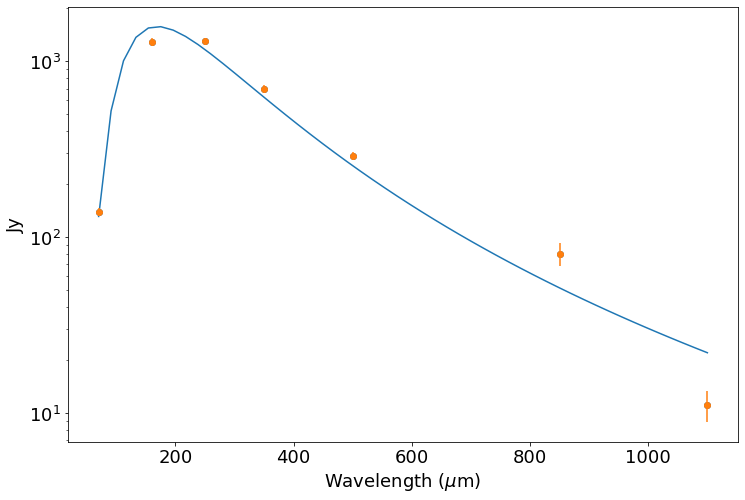

In [24]:
pl.figure(figsize=(12,8))
pl.rcParams.update({'font.size': 18})
pl.plot(freq.to(u.micron, u.spectral()), (du*area_as).to(u.Jy))#, color='#de541e')
pl.scatter(u.Quantity([p[0] for p in sed]).to(u.micron, u.spectral()), u.Quantity([p[1] for p in sed]))#, color='#ad2831')
pl.errorbar(x=u.Quantity([p[0] for p in sed]).to(u.micron, u.spectral()), y=u.Quantity([p[1] for p in sed]), yerr=u.Quantity([p[4] for p in sed]), fmt='o')#, color='#ad2831')

pl.xlabel('Wavelength ($\mu$m)')
pl.ylabel('Jy')
pl.yscale('log')
#pl.savefig('./plots/sed.pdf')
#pl.savefig('./plots/sed.png')

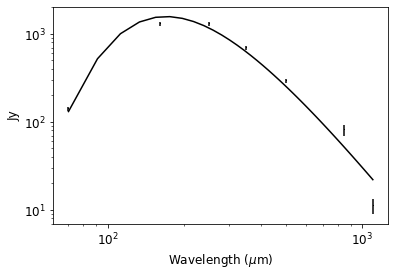

In [96]:
pl.figure(figsize=(6,4))
pl.rcParams.update({'font.size': 12})

pl.loglog(freq.to(u.micron, u.spectral()), (du*area_as).to(u.Jy), color='k')
#pl.scatter(u.Quantity([p[0] for p in sed]).to(u.micron, u.spectral()), u.Quantity([p[1] for p in sed]))#, color='blue')
pl.errorbar(x=u.Quantity([p[0] for p in sed]).to(u.micron, u.spectral()), y=u.Quantity([p[1] for p in sed]), yerr=u.Quantity([p[4] for p in sed]), fmt=',', color='k')

pl.xlabel('Wavelength ($\mu$m)')
pl.ylabel('Jy')
pl.savefig('/orange/adamginsburg/cmz/g5/code/plots/dustsed.pdf', bbox_inches='tight')

In [97]:
area = (area_as*(7*u.kpc)**2).to(u.cm**2, u.dimensionless_angles()) 
density = total_mass/(area**1.5) # very coarsely
density

<Quantity 1535.18223814 u / cm3>

In [98]:
column_density = modfit[2]
(area**0.5).to(u.pc)


<Quantity 11.82163496 pc>

In [99]:
# X_CO Calculation 
WCO = 466.06297*u.K/u.km/u.s #300*u.K/u.km/u.s
XCO = column_density / WCO
XCO

<Quantity 9.30673278e+18 km s / (cm2 K)>

In [100]:
#column_density* 2.8*u.Da
mass_t = (area * column_density * 2.8*u.Da).to(u.M_sun)
mass_t

<Quantity 13495.81888741 solMass>

In [101]:
density_1 = mass_t/(area**1.5) # very coarsely
density_1.to(u.Da / u.cm**3)

<Quantity 332.94445348 u / cm3>

In [102]:
column_density

<Quantity 4.33752352e+21 1 / cm2>

In [103]:
area.to(u.pc**2)

<Quantity 139.7510532 pc2>

In [104]:
area_as.to(u.arcmin**2)

<Quantity 33.70596574 arcmin2>

In [74]:
name_12co = '/orange/adamginsburg/cmz/g5/G5/sum/newcombination/galcorrected/g5.12CO.spw17.fits'
cube_12co = SpectralCube.read(name_12co).with_spectral_unit(u.km / u.s, velocity_convention='radio')
cut_cube_12co = cube_12co.with_mask(cube_12co>0.05*u.K).spectral_slab(0*u.km / u.second, 225*u.km/u.second).to(u.K)


In [79]:
mom0_12co = cut_cube_12co.moment0()
ww = wcs.WCS(mom0_12co.header)
preg = r0.to_pixel(ww)
mask = preg.to_mask()

In [80]:
cutout = mask.cutout(mom0_12co.data)

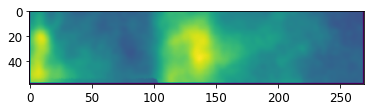

In [81]:
pl.imshow(mask.multiply(mom0_12co.data))

In [93]:
W = np.nanmean(mask.multiply(mom0_12co))
W

<Projection 373.28364278 K km / s>

In [94]:
np.nanstd(mask.multiply(mom0_12co))

<Projection 148.82109491 K km / s>

In [83]:
col_density_Xstrong = mask.multiply(mom0_12co) * 2.3*10**20 * u.cm**(-2) * (u.K * u.km / u.s)**(-1) * 0.8


In [95]:
column_density/W

<Projection 1.16199132e+19 s / (cm2 K km)>

In [105]:
(column_density/W / (2.3*10**20 * u.cm**(-2) * (u.K * u.km / u.s)**(-1)))**(-1)

<Projection 19.79360743>

In [89]:
2.7 * u.Msun / u.year

<Quantity 2.7 solMass / yr>

In [106]:
2.7 * u.Msun / u.year * column_density/(W*0.8) / (2.3*10**20 * u.cm**(-2) * (u.K * u.km / u.s)**(-1))

<Projection 0.1705096 solMass / yr>

In [16]:
sed_nobolo = [
    (70*u.micron, pacs70, 'pacs', '70 um'), # pacsfn_1
    (160*u.micron, pacs160, 'pacs', '160 um'), # pacsfn_1
    (250*u.micron, her250, 'Herschel', '250 um'), # herfn_1
    (350*u.micron, her350, 'Herschel', '350 um'), # herfn_2
    (500*u.micron, her500, 'Herschel', '500 um'), # herfn_3
    (850*u.micron, atlas850, 'ATLASGAL', '850 um')#,
    #((1.1*u.mm).to(u.micron), bolo11, 'Bolocam' ,'1.1 mm') # Bolocam
] 

In [17]:
modfit_nobolo = dust_emissivity.fit_sed.fit_modified_bb(xdata=u.Quantity([p[0] for p in sed_nobolo]).to(u.Hz, u.spectral()),
                                        flux=u.Quantity([p[1] for p in sed_nobolo]),
                                        error=u.Quantity([1*u.Jy for p in sed_nobolo]),
                                        guesses=[16*u.K, 1.5, 1e22*u.cm**-2],
                                        fitter='lmfit'
                                       )
modfit_nobolo

[<Quantity 16.13994505 K>,
 1.8170865229324795,
 <Quantity 4.79698333e+15 1 / cm2>]

In [18]:
du_nobolo = dust_emissivity.blackbody.modified_blackbody(
    #u.Quantity([p[0] for p in sed]).to(u.Hz, u.spectral()), 
    freq,
    temperature = modfit_nobolo[0], 
    beta = modfit_nobolo[1], 
    column = modfit_nobolo[2])
du_nobolo

<Quantity [1.49200009e-22, 7.97461689e-22, 1.84142506e-21, 2.82936967e-21,
           3.48799458e-21, 3.78448959e-21, 3.79980128e-21, 3.63441028e-21,
           3.37038269e-21, 3.06423955e-21, 2.75104426e-21, 2.45066742e-21,
           2.17314626e-21, 1.92253147e-21, 1.69942543e-21, 1.50257219e-21,
           1.32981800e-21, 1.17867040e-21, 1.04661001e-21, 9.31254491e-22,
           8.30433763e-22, 7.42216672e-22, 6.64909276e-22, 5.97039684e-22,
           5.37336367e-22, 4.84705270e-22, 4.38206572e-22, 3.97033646e-22,
           3.60494517e-22, 3.27994773e-22, 2.99023661e-22, 2.73141363e-22,
           2.49968902e-22, 2.29178746e-22, 2.10487682e-22, 1.93649982e-22,
           1.78452296e-22, 1.64708783e-22, 1.52257340e-22, 1.40956276e-22,
           1.30681381e-22, 1.21323749e-22, 1.12787430e-22, 1.04987975e-22,
           9.78507545e-23, 9.13097224e-23, 8.53063707e-23, 7.97887440e-23,
           7.47105116e-23, 7.00305213e-23] erg / (cm2 Hz s sr)>

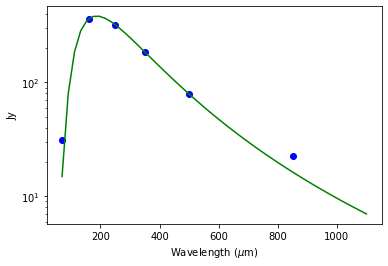

In [19]:
pl.plot(freq.to(u.micron, u.spectral()), du_nobolo.to(u.Jy / u.sr), color='green')
pl.scatter(u.Quantity([p[0] for p in sed_nobolo]).to(u.micron, u.spectral()), u.Quantity([p[1] for p in sed_nobolo]), color='blue')

pl.xlabel('Wavelength ($\mu$m)')
pl.ylabel('Jy')
pl.yscale('log')

Text(0, 0.5, 'Jy')

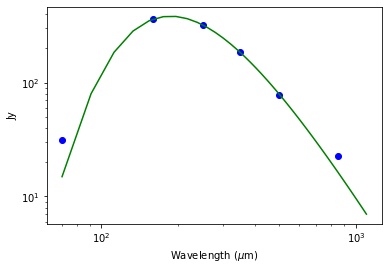

In [20]:
pl.loglog(freq.to(u.micron, u.spectral()), du_nobolo.to(u.Jy / u.sr), color='green')
pl.scatter(u.Quantity([p[0] for p in sed_nobolo]).to(u.micron, u.spectral()), u.Quantity([p[1] for p in sed_nobolo]), color='blue')
pl.xlabel('Wavelength ($\mu$m)')
pl.ylabel('Jy')

In [21]:
sed_noatlas = [
    (70*u.micron, pacs70, 'pacs', '70 um'), # pacsfn_1
    (160*u.micron, pacs160, 'pacs', '160 um'), # pacsfn_1
    (250*u.micron, her250, 'Herschel', '250 um'), # herfn_1
    (350*u.micron, her350, 'Herschel', '350 um'), # herfn_2
    (500*u.micron, her500, 'Herschel', '500 um'), # herfn_3
    #(850*u.micron, atlas850, 'ATLASGAL', '850 um')#,
    ((1.1*u.mm).to(u.micron), bolo11, 'Bolocam' ,'1.1 mm') # Bolocam
] 

In [22]:
modfit_noatlas = dust_emissivity.fit_sed.fit_modified_bb(xdata=u.Quantity([p[0] for p in sed_noatlas]).to(u.Hz, u.spectral()),
                                        flux=u.Quantity([p[1] for p in sed_noatlas]),
                                        error=u.Quantity([1*u.Jy for p in sed_noatlas]),
                                        guesses=[16*u.K, 2, 1e22*u.cm**-2],
                                        fitter='lmfit'
                                       )
modfit_noatlas

[<Quantity 16.22928261 K>,
 1.7951860064828236,
 <Quantity 4.78519432e+15 1 / cm2>]

In [23]:
du_noatlas = dust_emissivity.blackbody.modified_blackbody(
    #u.Quantity([p[0] for p in sed]).to(u.Hz, u.spectral()), 
    freq,
    temperature = modfit_noatlas[0], 
    beta = modfit_noatlas[1], 
    column = modfit_noatlas[2])
du_noatlas

<Quantity [1.52339294e-22, 8.05787923e-22, 1.85035025e-21, 2.83421936e-21,
           3.48780995e-21, 3.78071037e-21, 3.79439452e-21, 3.62894485e-21,
           3.36582255e-21, 3.06104228e-21, 2.74932694e-21, 2.45035012e-21,
           2.17405246e-21, 1.92445062e-21, 1.70214761e-21, 1.50590608e-21,
           1.33359823e-21, 1.18275863e-21, 1.05089363e-21, 9.35643495e-22,
           8.34857669e-22, 7.46620996e-22, 6.69252658e-22, 6.01291423e-22,
           5.41474446e-22, 4.88714214e-22, 4.42076264e-22, 4.00758098e-22,
           3.64070789e-22, 3.31422523e-22, 3.02304163e-22, 2.76277410e-22,
           2.52964185e-22, 2.32037706e-22, 2.13215145e-22, 1.96251137e-22,
           1.80932441e-22, 1.67073273e-22, 1.54511526e-22, 1.43105396e-22,
           1.32730562e-22, 1.23277931e-22, 1.14651458e-22, 1.06766412e-22,
           9.95479716e-23, 9.29299374e-23, 8.68535628e-23, 8.12666918e-23,
           7.61228232e-23, 7.13806074e-23] erg / (cm2 Hz s sr)>

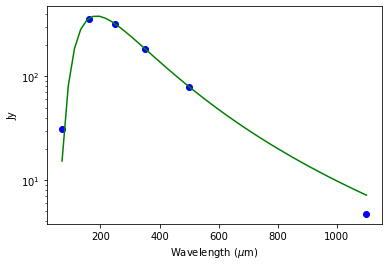

In [24]:
pl.plot(freq.to(u.micron, u.spectral()), du_noatlas.to(u.Jy / u.sr), color='green')
pl.scatter(u.Quantity([p[0] for p in sed_noatlas]).to(u.micron, u.spectral()), u.Quantity([p[1] for p in sed_noatlas]), color='blue')
#pl.scatter(u.Quantity([p[0] for p in sed]).to(u.micron, u.spectral()), u.Quantity([p[1] for p in sed]), color='orange')

pl.xlabel('Wavelength ($\mu$m)')
pl.ylabel('Jy')
pl.yscale('log')

Text(0, 0.5, 'Jy')

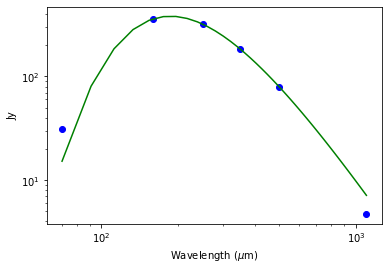

In [25]:
pl.loglog(freq.to(u.micron, u.spectral()), du_noatlas.to(u.Jy / u.sr), color='green')
pl.scatter(u.Quantity([p[0] for p in sed_noatlas]).to(u.micron, u.spectral()), u.Quantity([p[1] for p in sed_noatlas]), color='blue')
pl.xlabel('Wavelength ($\mu$m)')
pl.ylabel('Jy')

In [26]:
dust_emissivity.dust.massofsnu?

Signature:
dust_emissivity.dust.massofsnu(
    nu,
    snu,
    distance=<Quantity 1. kpc>,
    temperature=<Quantity 20. K>,
    muh2=2.8,
    beta=1.75,
    beamomega=<Quantity 1. sr>,
)
Docstring: <no docstring>
File:      /blue/adamginsburg/adamginsburg/repos/dust_emissivity/dust_emissivity/dust.py
Type:      function


In [27]:
dust_emissivity.dust.massofsnu(271.1*u.GHz, 4.7052907*u.Jy, 7*u.kpc, temperature=10*u.K)

<Quantity 8812.07200452 solMass>

In [28]:
dust_emissivity.dust.massofsnu(271.1*u.GHz, 4.7052907*u.Jy, 7*u.kpc, temperature=modfit[0], beta=modfit[1])
#temp,beta,col

<Quantity 4189.63901774 solMass>

In [29]:
dust_emissivity.dust.massofsnu(345*u.GHz, 50*u.Jy, 7*u.kpc, temperature=modfit[0], beta=modfit[1])

<Quantity 19793.54583619 solMass>

In [30]:
(250*u.micron).to(u.GHz, u.spectral())

<Quantity 1199.169832 GHz>

In [31]:
dust_emissivity.dust.massofsnu((250*u.micron).to(u.GHz, u.spectral()), her250, 7*u.kpc, temperature=modfit[0], beta=modfit[1])

<Quantity 5662.45297363 solMass>